In [14]:
import statistics
import math

def calculate_flexibility(machines_for_all_operations, n_machines): 
    counts = []

    for m in machines_for_all_operations:
        counts.append(len(m))
    
    return statistics.mean(counts) / n_machines

def calculate_duration_variety(durations):
    counts = []

    for d in durations:
        counts.append(len(d))

    return len(set(counts)) / len(counts)

def calculate_average_operations(job_sequence):
    n_jobs = 1
    counts = [1]
    for i in range(1, len(job_sequence)):
        if job_sequence[i] != job_sequence[i-1]:
            n_jobs+=1
            counts.append(0)
        counts[-1] += 1
    return (sum(counts))/n_jobs


In [15]:
def calculate_duration_features_workers(durations):
    all_durations = []
    for duration in durations:
        for d in duration:
            all_durations.extend(d)
    all_durations = [d for d in all_durations if d != 0]
    min_duration = min(all_durations)
    max_duration = max(all_durations)
    span = max_duration - min_duration
    stdev = statistics.stdev(all_durations)
    return min_duration, max_duration, span, stdev

def calculate_duration_features(durations):
    all_durations = []
    for duration in durations:
        all_durations.extend(duration)
    all_durations = [d for d in all_durations if d != 0]
    min_duration = min(all_durations)
    max_duration = max(all_durations)
    span = max_duration - min_duration
    #stdev = statistics.stdev(all_durations)
    mean = sum(all_durations)/len(all_durations)
    var = sum(pow(x-mean, 2) for x in all_durations) / len(all_durations)
    stdev = math.sqrt(var)
    return min_duration, max_duration, span, stdev


In [16]:
def calculate_average_assignments(durations):
    count = count_assignments(durations)
    return count / len(durations)

def count_assignments(durations):
    count = 0
    for operation in durations:
        for machine in operation:
            for worker in machine:
                if worker > 0:
                    count += 1
    return count

In [17]:
from benchmarkrewriter.benchmark_parser import WorkerBenchmarkParser, BenchmarkParser
import os
includeWorkers = False
if includeWorkers:
    path = r'C:\Users\huda\Downloads\benchmarks_with_workers\benchmarks_with_workers'
    parser = WorkerBenchmarkParser()
else:
    path = r'C:\Users\huda\Documents\GitHub\scheduling_model_jrc\code\upgrades\benchmarks\all'
    parser = BenchmarkParser()
instances = os.listdir(path)
instance_data = []
feature_vectors = []
consider_duration_features = True
for instance in instances:
    encoding = parser.parse_benchmark(path + "\\" + instance)
    feature_vector = []
    min_d, max_d, d_span, d_stdev = calculate_duration_features(encoding.durations()) if not includeWorkers else calculate_duration_features_workers(encoding.durations())
    #TODO: worker data, or just do it with base FJSSP since all benchmarks are transformed in the same way
    extracted_data = {
        "name": instance,
        "n_jobs": encoding.n_jobs(), 
        "n_machines": encoding.n_machines(),
        "n_operations": encoding.n_operations(),
        "durations": encoding.durations(),
        "job_sequence": encoding.job_sequence(),
        "machines_for_all_operations": encoding.get_all_machines_for_all_operations() if includeWorkers else encoding.get_machines_for_all_operations(),
        "flexibility": calculate_flexibility(encoding.get_all_machines_for_all_operations() if includeWorkers else encoding.get_machines_for_all_operations(), encoding.n_machines()),
        "duration_variety": calculate_duration_variety(encoding.durations()),
        "average_operations": calculate_average_operations(encoding.job_sequence()),
        "average_assignments": calculate_average_assignments(encoding.durations()),
        "n_assignments": count_assignments(encoding.durations()),
        "min_duration": min_d,
        "max_duration": max_d,
        "duration_span": d_span,
        "duration_std": d_stdev
    }
    feature_vector = [encoding.n_jobs(), encoding.n_machines(), encoding.n_operations(), extracted_data["flexibility"], extracted_data["duration_variety"], extracted_data["average_operations"]]
    if consider_duration_features:
        feature_vector.extend([min_d, max_d, d_span, d_stdev])
    feature_vectors.append(feature_vector)
    instance_data.append(extracted_data)


TypeError: 'numpy.int64' object is not iterable

In [ ]:
from sklearn.cluster import KMeans
inertias = []
n_clusters = 20
centers = []
results = []
for i in range(1, n_clusters+1):
    kmeans = KMeans(n_clusters=i)
    results.append(kmeans.fit_predict(feature_vectors))
    centers.append(kmeans.cluster_centers_)
    
    inertias.append(kmeans.inertia_)


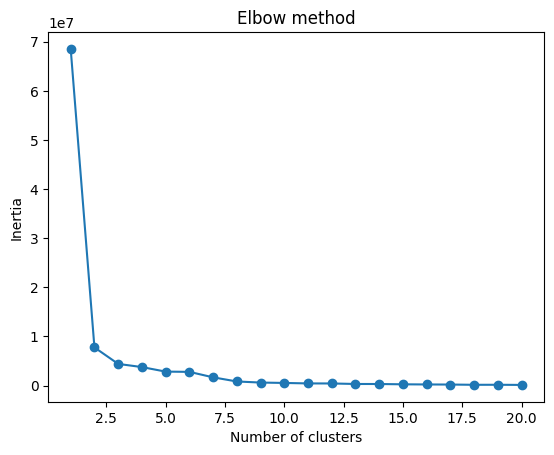

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,n_clusters+1), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
results[n_clusters-1]

array([ 8, 15, 15, 15, 15, 15,  3,  3,  3,  3, 18,  3, 18, 18, 18, 18, 18,
        8,  8,  8,  8, 18,  8, 15, 15, 15, 15, 15,  3,  3,  3,  3, 18,  3,
       18, 18, 18, 18, 18,  8,  8,  8,  8, 18,  8, 15, 15, 15, 15, 15,  3,
        3,  3,  3, 18,  3,  8,  8,  8,  8,  0,  7,  7, 15, 11, 11, 18, 18,
        7,  8,  8,  7,  8, 15,  5,  2,  2,  2,  2, 13, 13, 13, 13, 13, 13,
       18, 13, 13, 13, 13, 10, 10, 10, 10, 10,  0, 13,  0,  0,  0,  0,  6,
        6,  6,  6,  6,  0, 13,  0,  0,  0,  0, 13, 13, 11, 11, 11,  1, 19,
       16, 12,  1,  1,  1, 16, 16, 13, 13, 13, 19, 13, 13, 13,  8, 13, 13,
       13, 19, 19, 19,  2,  2,  2,  2,  2, 13, 13, 13, 13, 13, 13, 18, 13,
       13, 13, 13, 10, 10, 10, 10, 10,  0, 13,  0,  0,  0,  0,  6,  6,  6,
        6,  6,  0, 13,  0,  0,  0,  0, 13, 13, 11, 11, 11,  1, 19,  1, 12,
       16,  1,  1, 16, 16, 13, 13, 13, 19, 13, 13, 13,  8, 13, 13, 13, 19,
       19, 19,  2,  2,  2,  2,  2, 13, 13, 13, 13, 13, 13, 18, 13, 13, 13,
       13, 10, 10, 10, 10

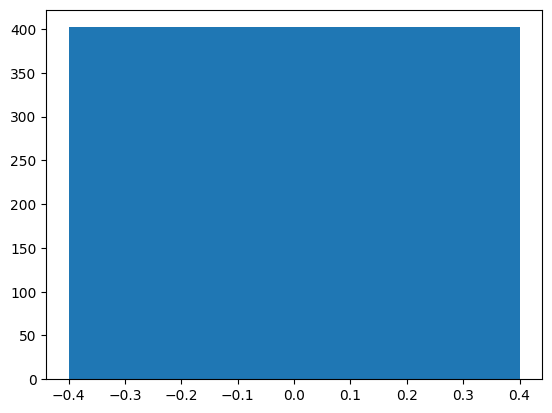

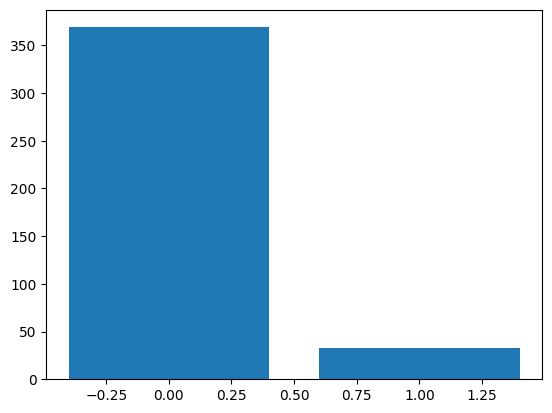

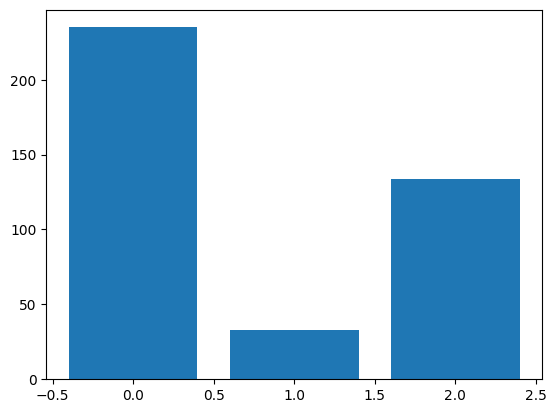

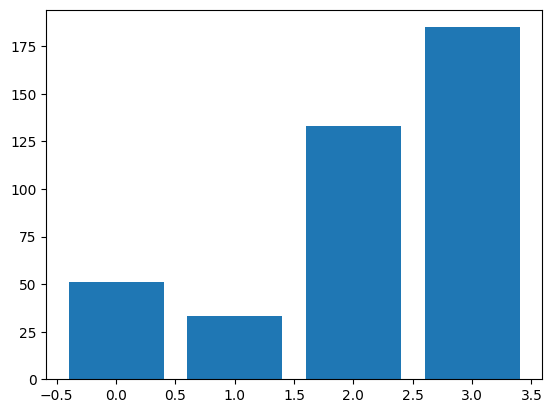

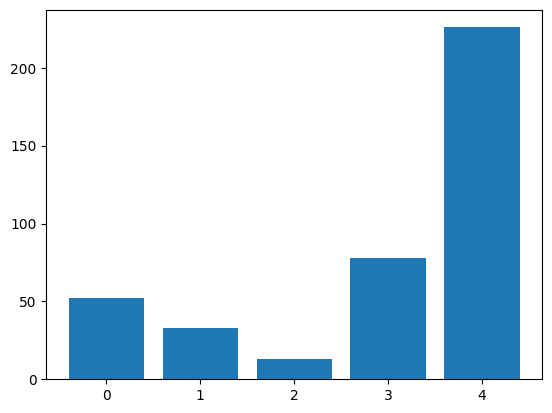

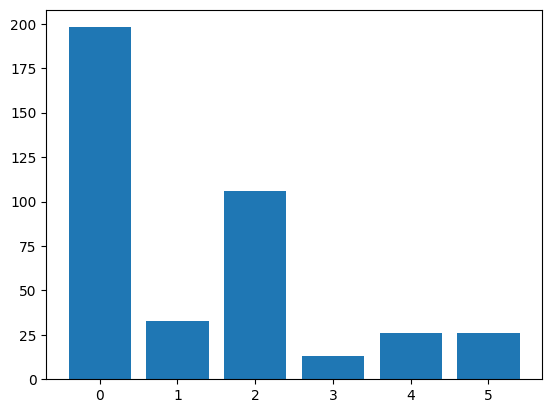

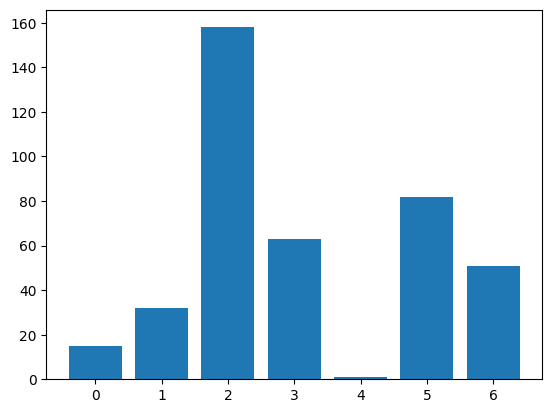

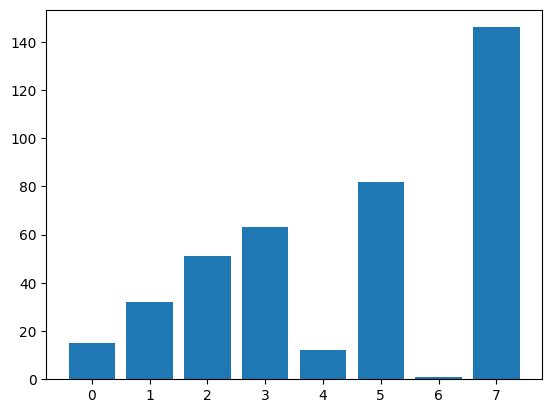

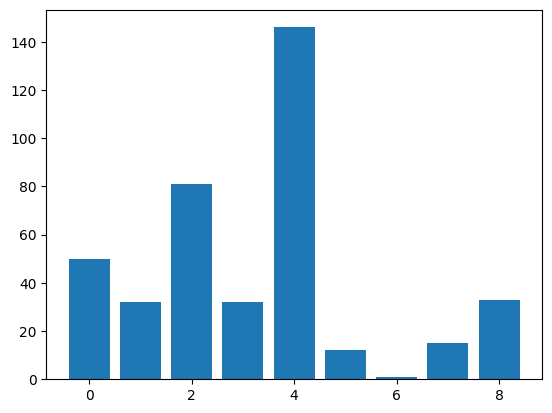

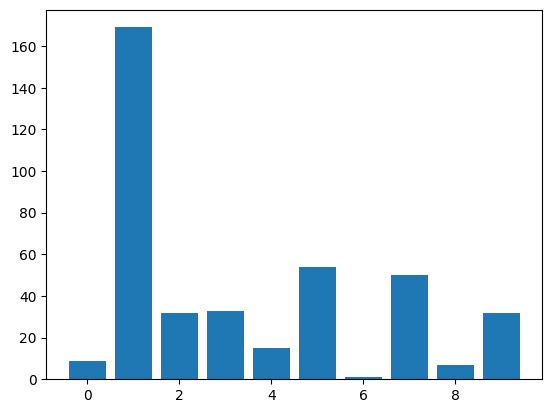

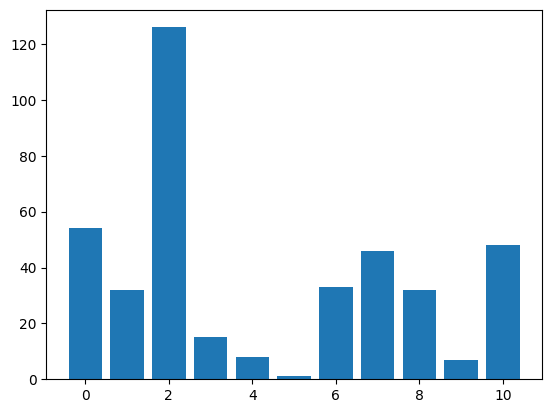

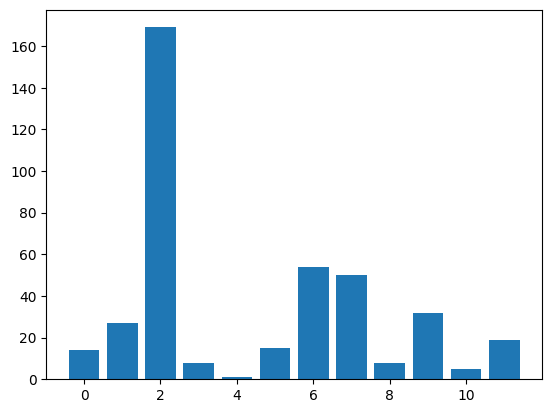

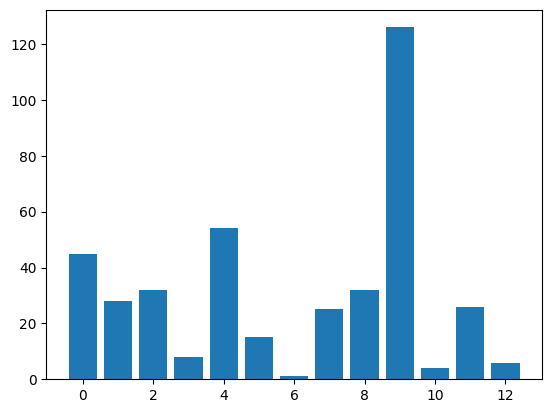

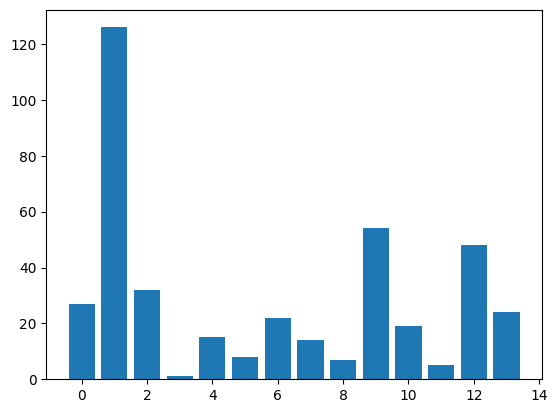

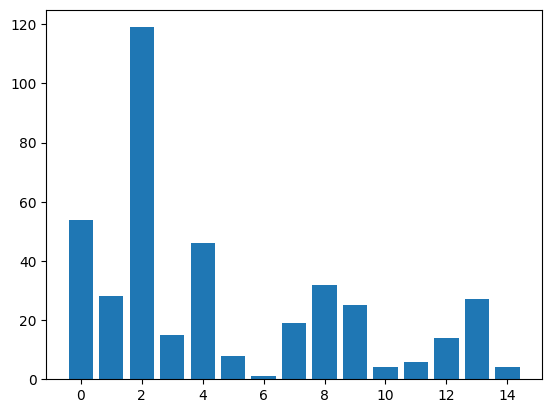

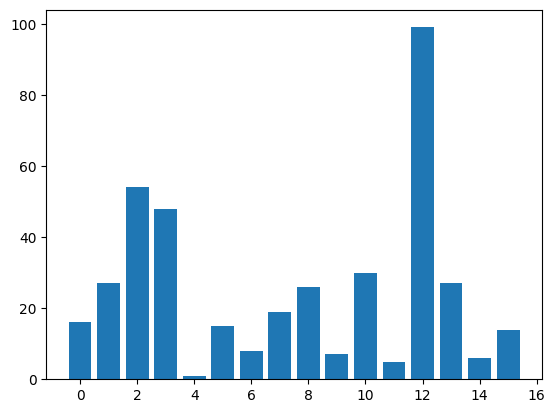

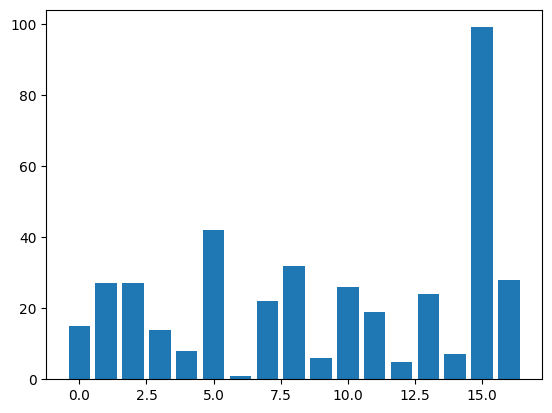

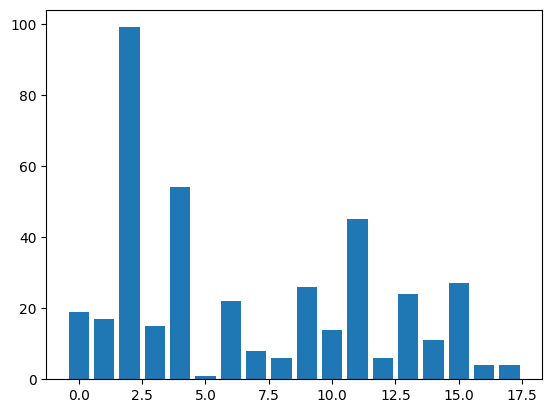

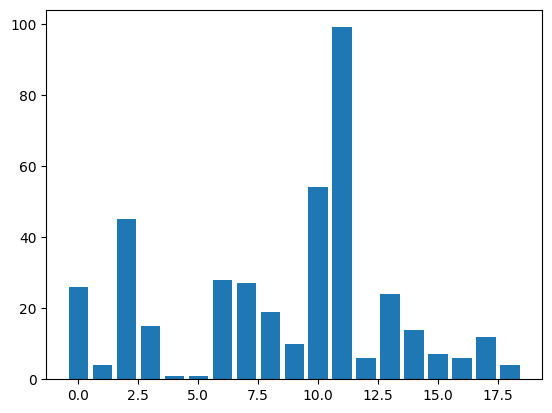

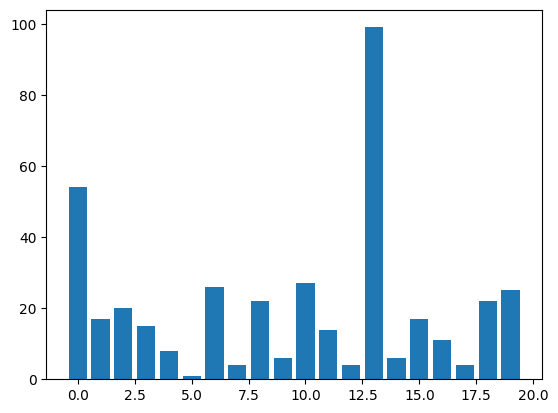

In [ ]:
def counts(result):
    bars = [0] * (max(result)+1)
    for value in result:
        bars[value] += 1
    return bars

for i in range(len(results)):
    result = results[i]
    plt.bar(range(0,max(result)+1), counts(result))
    plt.show()


In [ ]:
instance_data[0].keys()

dict_keys(['name', 'n_jobs', 'n_machines', 'n_operations', 'durations', 'job_sequence', 'machines_for_all_operations', 'flexibility', 'duration_variety', 'average_operations', 'average_assignments', 'n_assignments', 'min_duration', 'max_duration', 'duration_span', 'duration_std'])

In [ ]:
for instance in instance_data:
    print(f'{instance["name"]}: {instance["average_assignments"]}')

0_BehnkeGeiger_10_workers.fjs: 94.96
0_BehnkeGeiger_11_workers.fjs: 97.016
0_BehnkeGeiger_12_workers.fjs: 102.112
0_BehnkeGeiger_13_workers.fjs: 99.18
0_BehnkeGeiger_14_workers.fjs: 97.34
0_BehnkeGeiger_15_workers.fjs: 96.488
0_BehnkeGeiger_16_workers.fjs: 100.694
0_BehnkeGeiger_17_workers.fjs: 97.768
0_BehnkeGeiger_18_workers.fjs: 97.832
0_BehnkeGeiger_19_workers.fjs: 99.946
0_BehnkeGeiger_1_workers.fjs: 98.5
0_BehnkeGeiger_20_workers.fjs: 98.272
0_BehnkeGeiger_21_workers.fjs: 462.22
0_BehnkeGeiger_22_workers.fjs: 392.52
0_BehnkeGeiger_23_workers.fjs: 408.68
0_BehnkeGeiger_24_workers.fjs: 330.56
0_BehnkeGeiger_25_workers.fjs: 337.9
0_BehnkeGeiger_26_workers.fjs: 382.27
0_BehnkeGeiger_27_workers.fjs: 367.07
0_BehnkeGeiger_28_workers.fjs: 426.29
0_BehnkeGeiger_29_workers.fjs: 422.59
0_BehnkeGeiger_2_workers.fjs: 106.1
0_BehnkeGeiger_30_workers.fjs: 387.37
0_BehnkeGeiger_31_workers.fjs: 389.308
0_BehnkeGeiger_32_workers.fjs: 369.688
0_BehnkeGeiger_33_workers.fjs: 376.664
0_BehnkeGeiger_3

In [ ]:
grouped_by_source = dict()
for instance in instance_data:
    prefix = instance['name'].split('_')[0]
    if prefix not in grouped_by_source:
        grouped_by_source[prefix] = []
    grouped_by_source[prefix].append(instance)

In [ ]:
for group in grouped_by_source:
    data = grouped_by_source[group]
    assignments = [instance['n_assignments'] for instance in data]
    operations = [instance['n_operations'] for instance in data]
    flexibility = [instance['flexibility'] for instance in data]
    aoperations = [instance['average_operations'] for instance in data]
    aassignments = [instance['average_assignments'] for instance in data]
    dv = [instance['duration_variety'] for instance in data]
    avg_assignments = statistics.mean(assignments)
    avg_operations = statistics.mean(operations)
    avg_flexibility = statistics.mean(flexibility)
    avg_duration_variety = statistics.mean(dv)
    avg_aoperations = statistics.mean(aoperations)
    avg_aassignments = statistics.mean(aassignments)
    print(f'{group} = n-{len(data)} | O-{avg_operations} | A-{avg_assignments} | F-{avg_flexibility} |  DV-{avg_duration_variety} | AO-{avg_aoperations} | AA-{avg_aassignments}')

0 = n-60 | O-225 | A-98806.11666666667 | F-0.31559 |  DV-0.009000000000000001 | AO-5.0 | AA-443.15936666666664
1 = n-15 | O-171.86666666666667 | A-3427.4 | F-0.3103298455580747 |  DV-0.0076205040466922 | AO-8.561111111111112 | AA-17.87042994059558
2a = n-66 | O-133.37878787878788 | A-1078.9545454545455 | F-0.1309944684944685 |  DV-0.010307466553408112 | AO-8.846969696969698 | AA-7.0258320308239135
2b = n-66 | O-133.37878787878788 | A-1225.4848484848485 | F-0.1511374852523633 |  DV-0.010307466553408112 | AO-8.846969696969698 | AA-8.022289288092859
2c = n-66 | O-133.37878787878788 | A-2116.6969696969695 | F-0.25788897314428616 |  DV-0.010307466553408112 | AO-8.846969696969698 | AA-13.841547251900336
2d = n-66 | O-133.37878787878788 | A-5454.530303030303 | F-0.4761788518638105 |  DV-0.010307466553408112 | AO-8.846969696969698 | AA-32.250309095365914
3 = n-18 | O-292 | A-5294.666666666667 | F-0.3301358696418395 |  DV-0.0036996631425894517 | AO-19.494444444444447 | AA-16.20760009797736
4 = 

In [ ]:
for instance in instance_data:
    if instance['name'].startswith('0_BehnkeGeiger_60'):
        print(f'O-{instance["n_operations"]} | A-{instance["n_assignments"]} | AA-{instance["average_assignments"]} | F-{instance["flexibility"]} | DV-{instance["duration_variety"]} | M-{instance["durations"].shape[1]} | W-{instance["durations"].shape[2]}')

O-500 | A-402081 | AA-804.162 | F-0.2941333333333333 | DV-0.002 | M-60 | W-90


In [ ]:
500*60*90

2700000

In [ ]:
402081/2700000 

0.14891888888888888

In [18]:
fjssp_path = r'C:\Users\huda\Downloads\paper_results\paper_results\benchmarks_no_workers'

In [19]:
import os
benchmark_files = os.listdir(fjssp_path)

In [20]:
instances = dict()
for file in benchmark_files:
    parser = BenchmarkParser()
    instance = parser.parse_benchmark(fjssp_path + '\\' + file)
    instances[file[:-4]] = instance

In [21]:
instances.keys()

dict_keys(['Behnke1', 'Behnke10', 'Behnke11', 'Behnke12', 'Behnke13', 'Behnke14', 'Behnke15', 'Behnke16', 'Behnke17', 'Behnke18', 'Behnke19', 'Behnke2', 'Behnke20', 'Behnke21', 'Behnke22', 'Behnke23', 'Behnke24', 'Behnke25', 'Behnke26', 'Behnke27', 'Behnke28', 'Behnke29', 'Behnke3', 'Behnke30', 'Behnke31', 'Behnke32', 'Behnke33', 'Behnke34', 'Behnke35', 'Behnke36', 'Behnke37', 'Behnke38', 'Behnke39', 'Behnke4', 'Behnke40', 'Behnke41', 'Behnke42', 'Behnke43', 'Behnke44', 'Behnke45', 'Behnke46', 'Behnke47', 'Behnke48', 'Behnke49', 'Behnke5', 'Behnke50', 'Behnke51', 'Behnke52', 'Behnke53', 'Behnke54', 'Behnke55', 'Behnke56', 'Behnke57', 'Behnke58', 'Behnke59', 'Behnke6', 'Behnke60', 'Behnke7', 'Behnke8', 'Behnke9', 'BrandimarteMk1', 'BrandimarteMk10', 'BrandimarteMk11', 'BrandimarteMk12', 'BrandimarteMk13', 'BrandimarteMk14', 'BrandimarteMk15', 'BrandimarteMk2', 'BrandimarteMk3', 'BrandimarteMk4', 'BrandimarteMk5', 'BrandimarteMk6', 'BrandimarteMk7', 'BrandimarteMk8', 'BrandimarteMk9', 'C

In [32]:
by_sources = {
    'Behnke':[],
    'Brandimarte':[],
    'HurinkSData':[],
    'HurinkEData':[],
    'HurinkRData':[],
    'HurinkVData':[],
    'DPPaulli':[],
    'ChambersBarnes':[],
    'Kacem':[],
    'Fattahi':[],
}

In [33]:
for instance in instances:
    if instance.lower().startswith('behnke'):
        by_sources['Behnke'].append(instances[instance])
    elif instance.lower().startswith('brand'):
        by_sources['Brandimarte'].append(instances[instance])
    elif instance.lower().startswith('hurinks'):
        by_sources['HurinkSData'].append(instances[instance])
    elif instance.lower().startswith('hurinke'):
        by_sources['HurinkEData'].append(instances[instance])
    elif instance.lower().startswith('hurinkr'):
        by_sources['HurinkRData'].append(instances[instance])
    elif instance.lower().startswith('hurinkv'):
        by_sources['HurinkVData'].append(instances[instance])
    elif instance.lower().startswith('dp'):
        by_sources['DPPaulli'].append(instances[instance])
    elif instance.lower().startswith('ch'):
        by_sources['ChambersBarnes'].append(instances[instance])
    elif instance.lower().startswith('ka'):
        by_sources['Kacem'].append(instances[instance])
    elif instance.lower().startswith('fa'):
        by_sources['Fattahi'].append(instances[instance])
        
        


In [34]:
len(instances)

402

In [37]:
for source in by_sources:
    print(len(by_sources[source]))

60
15
66
66
66
66
18
21
4
20


In [53]:
def get_average(data):
    n_operations = 0
    op_per_job = 0
    machines = 0
    flexibility = 0.0
    dv = 0.0
    jobs = 0
    n = len(data)
    for i in range(len(data)):
    #for instance in data:
        n_operations += data[i].n_operations()
        op_per_job += data[i].n_operations()/data[i].n_jobs()
        machines += data[i].n_machines()
        flexibility += calculate_flexibility(data[i].get_machines_for_all_operations(), data[i].n_machines())
        dv += calculate_duration_variety(data[i].durations())
        jobs += data[i].n_jobs()
    return n_operations/n, op_per_job/n, machines/n, flexibility/n, dv/n, jobs/n

def to_table(by_sources, source, i):
    ops, ops_per_job, machs, f, dv, j = get_average(by_sources[source])
    return f'{i} & {source} & {len(by_sources[source])} & {j} & {ops} & {ops_per_job} & {machs} & {f} & {dv} &'

In [54]:
i = 1
for source in by_sources:
    print(to_table(by_sources, source, i))
    i+=1

    

1 & Behnke & 60 & 45.0 & 225.0 & 5.0 & 40.0 & 0.31559 & 0.009000000000000005 &
2 & Brandimarte & 15 & 20.333333333333332 & 171.86666666666667 & 8.56111111111111 & 9.133333333333333 & 0.3103298455580747 & 0.0076205040466922 &
3 & HurinkSData & 66 & 14.757575757575758 & 133.37878787878788 & 8.846969696969696 & 8.848484848484848 & 0.1309944684944684 & 0.010307466553408114 &
4 & HurinkEData & 66 & 14.757575757575758 & 133.37878787878788 & 8.846969696969696 & 8.848484848484848 & 0.15113748525236342 & 0.010307466553408114 &
5 & HurinkRData & 66 & 14.757575757575758 & 133.37878787878788 & 8.846969696969696 & 8.848484848484848 & 0.25788897314428616 & 0.010307466553408114 &
6 & HurinkVData & 66 & 14.757575757575758 & 133.37878787878788 & 8.846969696969696 & 8.848484848484848 & 0.4761788518638105 & 0.010307466553408114 &
7 & DPPaulli & 18 & 15.0 & 292.0 & 19.49444444444445 & 7.666666666666667 & 0.33013586964183955 & 0.0036996631425894513 &
8 & ChambersBarnes & 21 & 13.333333333333334 & 158.33333

In [57]:
def get_average(data):
    n_operations = 0
    op_per_job = 0
    machines = 0
    flexibility = 0.0
    dv = 0.0
    jobs = 0
    n = len(data)
    #for i in range(len(data)):
    for instance in data:
        n_operations += data[instance].n_operations()
        op_per_job += data[instance].n_operations()/data[instance].n_jobs()
        machines += data[instance].n_machines()
        flexibility += calculate_flexibility(data[instance].get_machines_for_all_operations(), data[instance].n_machines())
        dv += calculate_duration_variety(data[instance].durations())
        jobs += data[instance].n_jobs()
    return n_operations/n, op_per_job/n, machines/n, flexibility/n, dv/n, jobs/n

def to_table(all):
    ops, ops_per_job, machs, f, dv, j = get_average(all)
    return f'{i} & {source} & {len(all)} & {j} & {ops} & {ops_per_job} & {machs} & {f} & {dv} &'

In [58]:
print(to_table(instances))



11 & Fattahi & 402 & 18.898009950248756 & 150.1144278606965 & 8.536194029850748 & 13.512437810945274 & 0.28063475274230215 & 0.014216459765419886 &
